In [1]:
import pandas as pd
from sequenzo import *

df_svl_prevalence = pd.read_csv("svl_prevalence.csv")
df_incident_rate= pd.read_csv("incident_rate.csv")

In [2]:
time_cols = ["2017",  "2018",  "2019", "2020", "2021", "2022", "2023"]


print("\n------seq_incident------")
seq_incident= SequenceData(
    data=df_incident_rate,
    time_type='year',
    time = [ '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
    states=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%'],
    labels=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']
)

print("\n------seq_prevalence------")
seq_prevalence= SequenceData(
    data=df_svl_prevalence,
    time_type='year',
    time = ['2017', '2018', '2019', '2020', '2021', '2022', '2023'],
    states=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%'],
    labels=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']
)



------seq_incident------

[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 61
[>] Min/Max sequence length: 7 / 7
[>] Alphabet: ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']

------seq_prevalence------

[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 61
[>] Min/Max sequence length: 7 / 7
[>] Alphabet: ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']


In [3]:
om_seq_incident =get_distance_matrix(seqdata=seq_incident,
                       method="OM",
                       sm="CONSTANT",
                       indel=1)

om_seq_prevalence =get_distance_matrix(seqdata=seq_prevalence,
                       method="OM",
                       sm="CONSTANT",
                       indel=1)



[>] Processing 61 sequences with 5 unique states.
  - Creating 6x6 substitution-cost matrix using 2 as constant value
[>] Indel cost generated.

[>] Identified 32 unique sequences.
[>] Sequence length: min/max = 7 / 7.

[>] Starting Optimal Matching(OM)...
[>] Computing all pairwise distances...
[>] Computed Successfully.
[>] Processing 61 sequences with 5 unique states.
  - Creating 6x6 substitution-cost matrix using 2 as constant value
[>] Indel cost generated.

[>] Identified 37 unique sequences.
[>] Sequence length: min/max = 7 / 7.

[>] Starting Optimal Matching(OM)...
[>] Computing all pairwise distances...
[>] Computed Successfully.


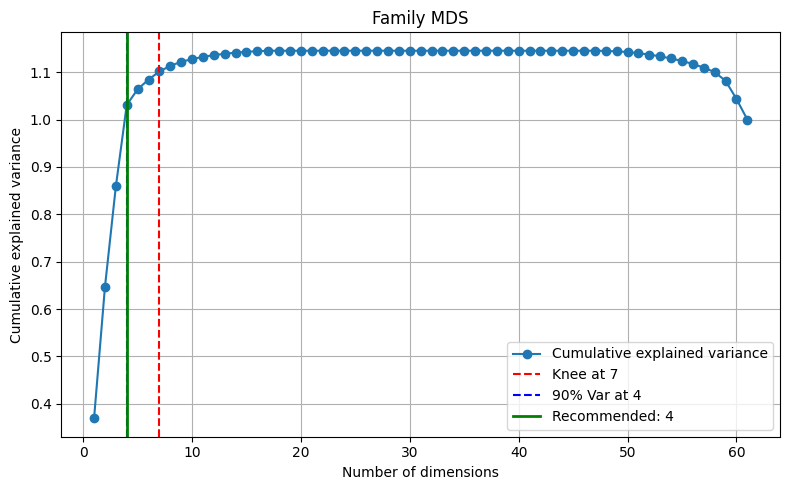

最终推荐维度（Family）： 154


In [4]:
import numpy as np

# MDS 处理
X_family, eigvals_family = cmdscale(om_seq_incident)

# 计算解释方差
explained_ratio = eigvals_family / eigvals_family.sum()
cum_explained = np.cumsum(explained_ratio)

# 自动选择维度
result_family = find_optimal_mds_dimension(
    cum_explained,
    title='Family MDS',
    var_threshold=0.90,
    max_dim=100
)

optimal_dim_family = result_family['recommended']
print("最终推荐维度（Family）：", 154)

# 获取最终嵌入矩阵
X_family_optimal = X_family[:, :optimal_dim_family]

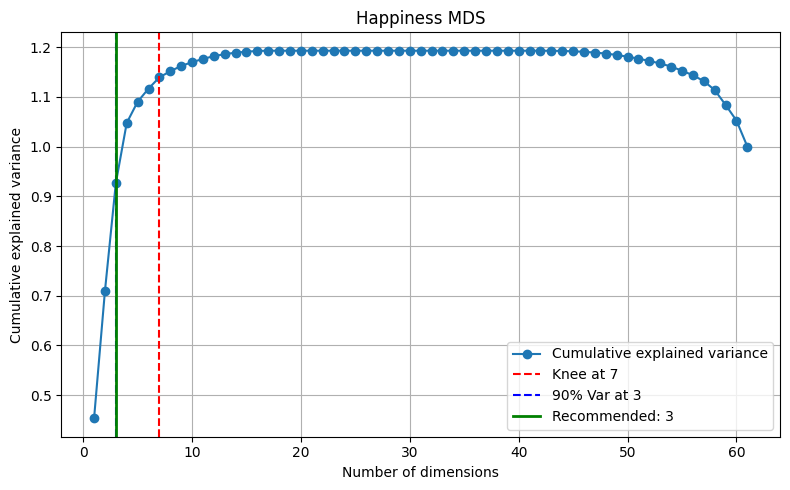

最终推荐维度（Happiness）： 3


In [5]:
# MDS 处理
X_happiness, eigvals_family = cmdscale(om_seq_prevalence)

# 计算解释方差
explained_ratio = eigvals_family / eigvals_family.sum()
cum_explained = np.cumsum(explained_ratio)

# 自动选择维度
result_happiness = find_optimal_mds_dimension(
    cum_explained,
    title='Happiness MDS',
    var_threshold=0.90,
    max_dim=100
)

optimal_dim_happiness = result_happiness['recommended']
print("最终推荐维度（Happiness）：", optimal_dim_happiness)

# 获取最终嵌入矩阵
X_happiness_optimal = X_happiness[:, :optimal_dim_happiness]

In [6]:
# 获取最终嵌入矩阵
X_concat = np.hstack([X_family_optimal, X_happiness_optimal])

X_concat

array([[ 2.36138586e+00, -4.57405461e+00,  6.10547888e+00,
        -4.47201815e+00, -4.10574596e+00,  3.74430345e+00,
        -7.43811924e+00],
       [ 3.44639666e+00, -3.06753944e+00, -5.86097805e+00,
        -2.71140152e+00, -4.32640779e+00,  5.01210112e+00,
         7.14320770e+00],
       [ 3.44740335e+00,  1.55928415e+00, -2.91584637e+00,
         2.16255107e+00, -8.27074056e-01, -1.97247489e+00,
         3.40652454e+00],
       [ 2.60368490e+00, -2.32421166e+00, -8.12624986e+00,
        -2.28129423e+00, -4.32640779e+00,  5.01210112e+00,
         7.14320770e+00],
       [ 4.30587344e+00, -8.56209247e-01, -5.69055776e+00,
         1.76993652e+00, -4.15369386e+00,  6.19906574e-01,
         5.63788926e+00],
       [-8.55244113e+00, -3.72664485e+00, -4.82747882e-01,
         1.49027317e+00,  6.85750924e+00, -7.60739356e-01,
         2.98260799e-01],
       [ 4.28869385e+00, -4.04640890e+00, -4.10971930e+00,
        -3.33551354e+00, -6.36943930e+00,  3.87032627e+00,
        -6.6013896

In [18]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
cluster_labels = clusterer.fit_predict(X_concat)

# 看一下聚了几个 cluster
print(np.unique(cluster_labels, return_counts=True))

(array([-1,  0,  1]), array([22, 26, 13]))


/Users/lei/Documents/Sequenzo_all_folders/Sequenzo-main/venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/lei/Documents/Sequenzo_all_folders/Sequenzo-main/venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [25]:

# 构建 DataFrame 用于 plot
hdbscan_df = pd.DataFrame({
    "ID": df_incident_rate["Country"],
    "Cluster ID": cluster_labels
})

hdbscan_df["ID"] = hdbscan_df["ID"].astype(str)  # 或 int，看你 seqdata.ids 是啥类型

hdbscan_df

,ID,Cluster ID
0,Angola,-1
1,Bahamas,0
2,Barbados,0
3,Belize,-1
4,Benin,0
...,...,...
56,Uganda,1
57,Ukraine,0
58,Vietnam,0
59,Zambia,1


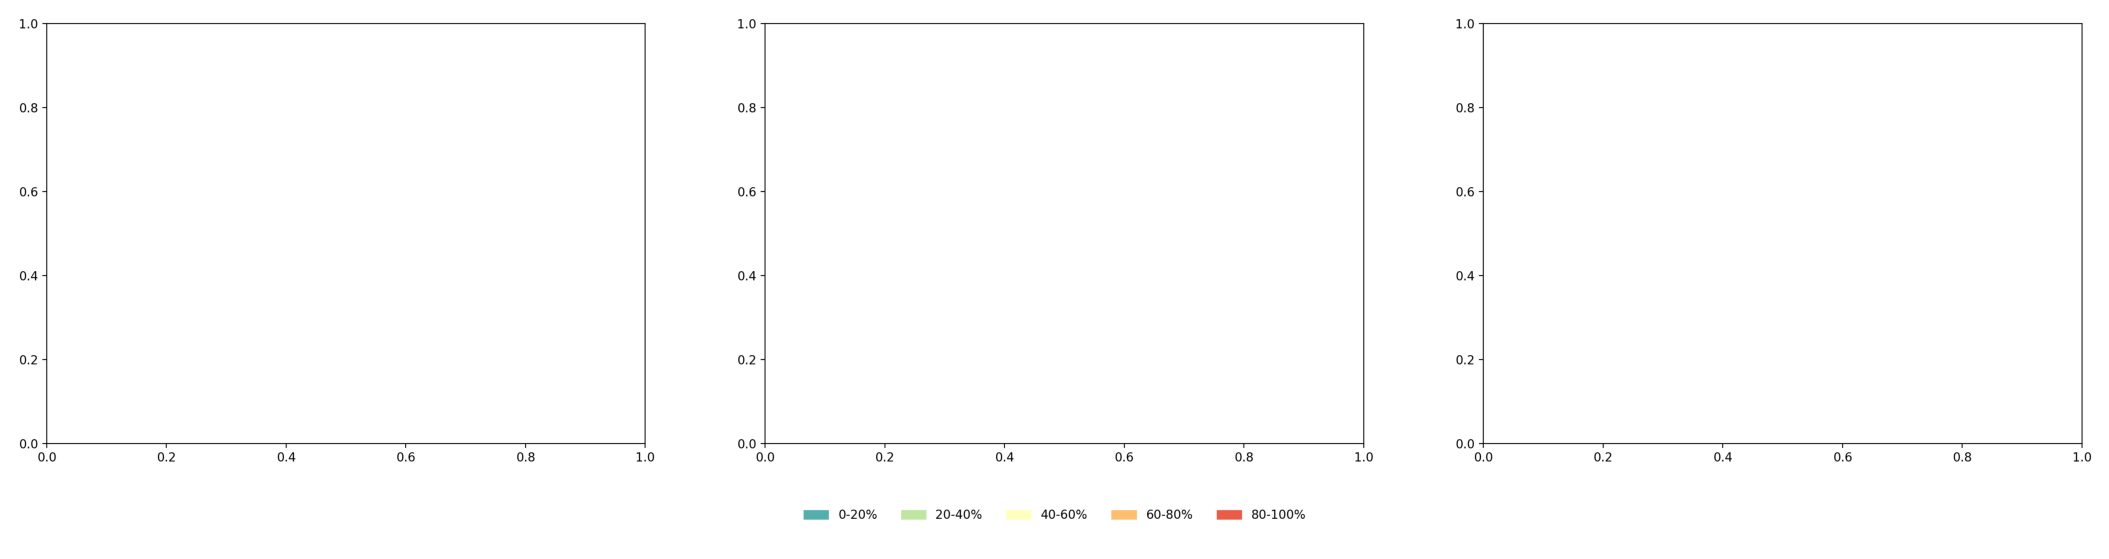

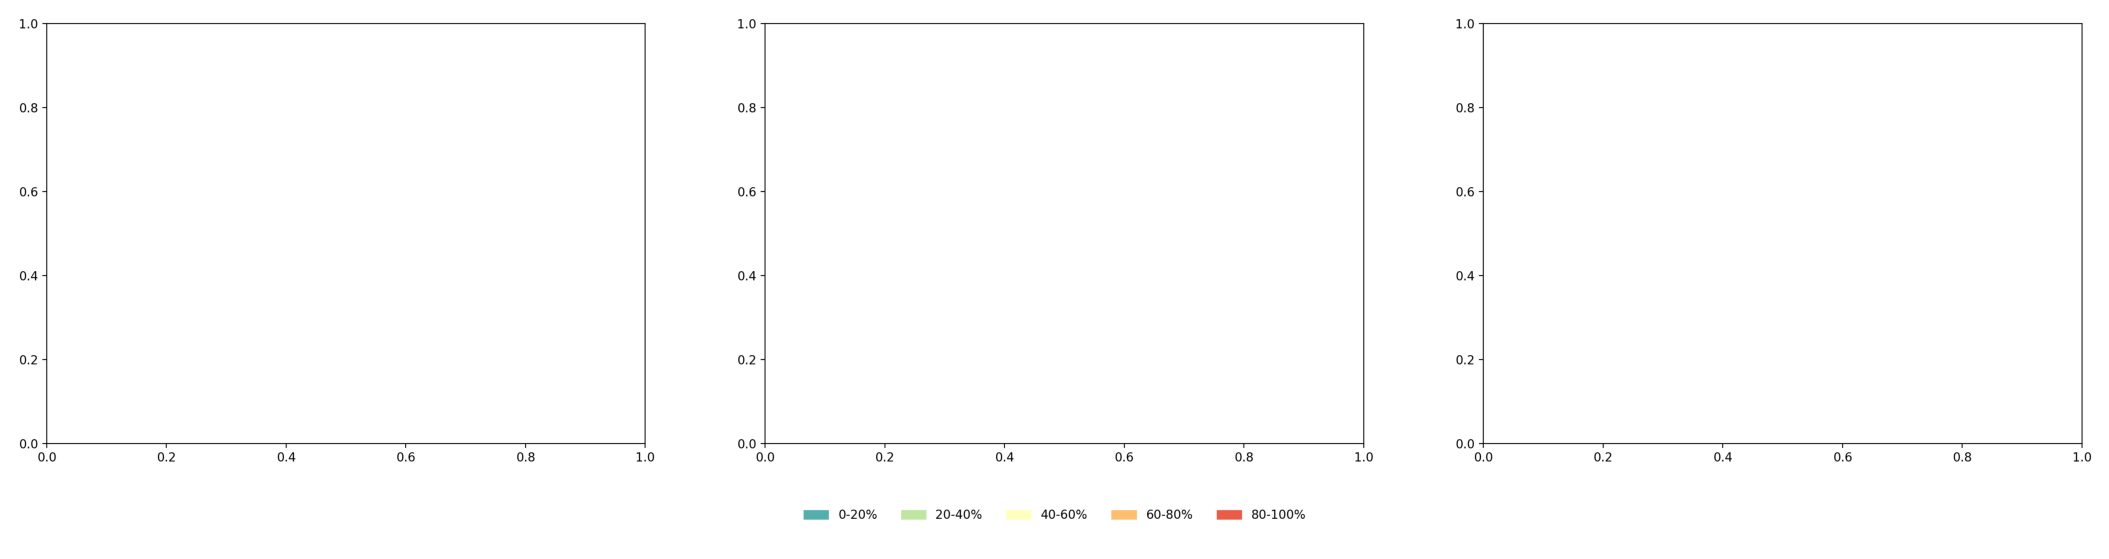

In [26]:
# 可视化 family sequence 按 cluster
plot_sequence_index(seqdata=seq_incident,
                    id_group_df=hdbscan_df,
                    categories='Cluster ID',
                    save_as='hdbscan_seq_incident_plot')

# 可视化 happiness sequence 按 cluster
plot_sequence_index(seqdata=seq_prevalence,
                    id_group_df=hdbscan_df,
                    categories='Cluster ID',
                    save_as='hdbscan_seq_prevalence_plot')